#**Importing Libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib
import warnings
warnings.filterwarnings("ignore")

#**Import Dataset**

In [2]:
#df = pd.read_csv("Heart_Disease_Project/data/heart_disease.csv")
df = pd.read_csv("/content/data/heart_disease_selected.csv")
df.head()

,sex,cp,thalach,exang,oldpeak,slope,ca,thal,target
0,1,1,150.0,0,2.3,3,0.0,6.0,0
1,1,4,108.0,1,1.5,2,2.5,3.0,1
2,1,4,129.0,1,2.6,2,2.0,7.0,1
3,1,3,187.0,0,3.5,3,0.0,3.0,0
4,0,2,172.0,0,1.4,1,0.0,3.0,0


#**Checking Nulls**

In [3]:
df.isnull().sum()

,0
sex,0
cp,0
thalach,0
exang,0
oldpeak,0
slope,0
ca,0
thal,0
target,0


#**Spliting & Scaling Data**



In [4]:
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Training On Diffrent Model**

In [5]:
# Defining Result That Saves The Results
results = []

#**Logistic Regression**

In [6]:
logistic_model = LogisticRegression(max_iter=5000, random_state=42, class_weight="balanced")
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print("=== Logistic Regression ===")
print("Train Accuracy:", accuracy_score(y_train, logistic_model.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Logistic Regression ===
Train Accuracy: 0.8264462809917356
Test Accuracy : 0.9016393442622951

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.91      0.91      0.91        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



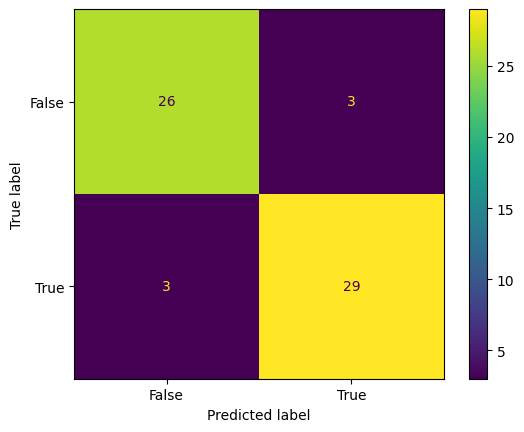

In [7]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]).plot()
plt.show()

In [8]:
# Append The Results
results.append({
    "Model": "Logistic Regression",
    "Train Accuracy": accuracy_score(y_train, logistic_model.predict(X_train)),
    "Test Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
})

In [9]:
# Save the Model
joblib.dump(logistic_model, "Apps/logistic_model.pkl")

['Apps/logistic_model.pkl']

#**Random Forest**

In [10]:
random_forest_model = RandomForestClassifier(
    n_estimators=500, max_depth=10, min_samples_split=5, min_samples_leaf=2,
    random_state=42, class_weight="balanced"
)
random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)

print("=== Random Forest ===")
print("Train Accuracy:", accuracy_score(y_train, random_forest_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Random Forest ===
Train Accuracy: 0.9297520661157025
Test Accuracy: 0.8852459016393442

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



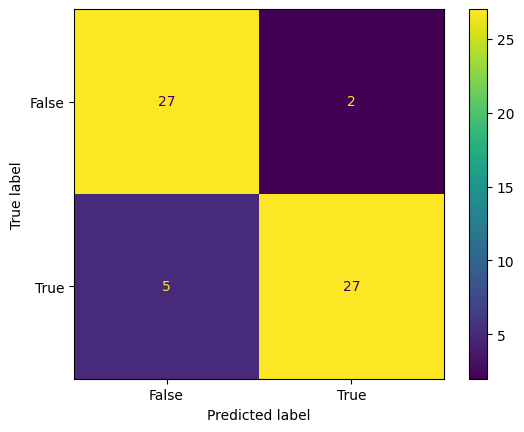

In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]).plot()
plt.show()

In [12]:
# Append The Results
results.append({
    "Model": "Random Forest",
    "Train Accuracy": accuracy_score(y_train, random_forest_model.predict(X_train)),
    "Test Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred)
})

In [13]:
# Save the Model
joblib.dump(random_forest_model, "Apps/random_forest_model.pkl")

['Apps/random_forest_model.pkl']

#**KNN**

In [14]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print("=== KNN ===")
print("Train Accuracy:", accuracy_score(y_train, knn_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== KNN ===
Train Accuracy: 0.7933884297520661
Test Accuracy: 0.819672131147541

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



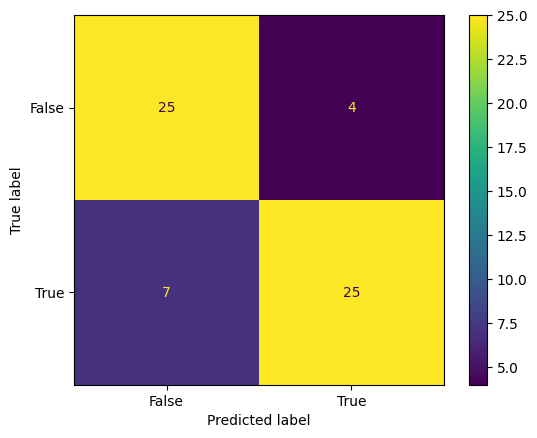

In [15]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True]).plot()
plt.show()

In [16]:
# Append The Results
results.append({"Model": "KNN",
                "Test Accuracy": accuracy_score(y_test, y_pred),
                "Precision": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["precision"],
                "Recall": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["recall"],
                "F1 Score": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"]})

In [17]:
# Save the Model
joblib.dump(knn_model, "Apps/knn_model.pkl")

['Apps/knn_model.pkl']

#**SVC**

In [18]:
svc_model = SVC(probability=True, kernel="rbf", random_state=42, class_weight="balanced")
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

print("=== SVC ===")
print("Train Accuracy:", accuracy_score(y_train, svc_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== SVC ===
Train Accuracy: 0.6900826446280992
Test Accuracy: 0.7704918032786885

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.82      0.72      0.77        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



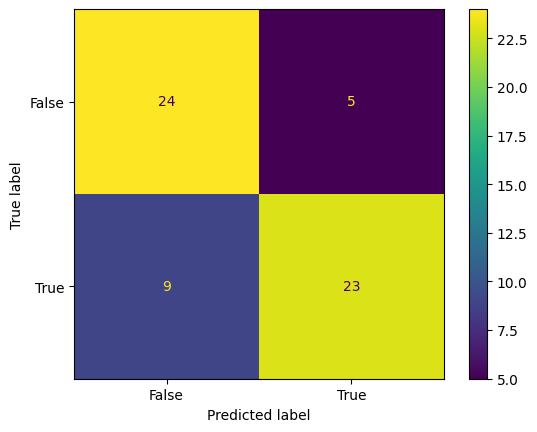

In [19]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=[False, True]).plot()
plt.show()

In [20]:
# Append The Results
results.append({"Model": "SVC",
                "Test Accuracy": accuracy_score(y_test, y_pred),
                "Precision": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["precision"],
                "Recall": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["recall"],
                "F1 Score": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"]})

In [21]:
# Save the Model
joblib.dump(svc_model, "Apps/svc_model.pkl")

['Apps/svc_model.pkl']

#**Decision Tree**

In [22]:
dt_model = DecisionTreeClassifier(max_depth=6, min_samples_split=4, random_state=42, class_weight="balanced")
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print("=== Decision Tree ===")
print("Train Accuracy:", accuracy_score(y_train, dt_model.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

=== Decision Tree ===
Train Accuracy: 0.9173553719008265
Test Accuracy: 0.8032786885245902

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.86      0.81        29
           1       0.86      0.75      0.80        32

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.81      0.80      0.80        61



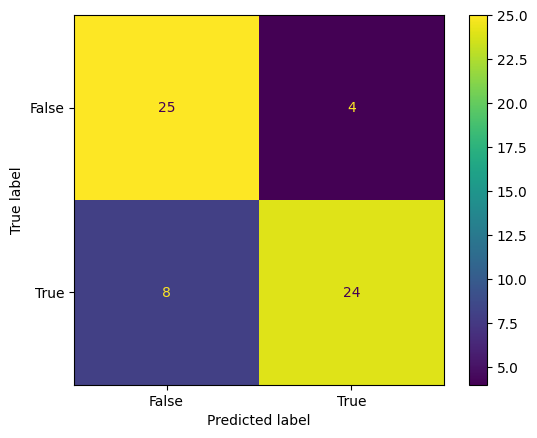

In [23]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=[False, True]).plot()
plt.show()

In [24]:
# Append The Results
results.append({"Model": "Decision Tree",
                "Test Accuracy": accuracy_score(y_test, y_pred),
                "Precision": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["precision"],
                "Recall": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["recall"],
                "F1 Score": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"]})

In [25]:
# Save the Model
joblib.dump(dt_model, "Apps/decision_tree_model.pkl")

['Apps/decision_tree_model.pkl']

#**Final Results**

In [26]:
results_df = pd.DataFrame(results)
results_df

,Model,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.826446,0.901639,0.906250,0.906250,0.906250
1,Random Forest,0.929752,0.885246,0.931034,0.843750,0.885246
2,KNN,NaN,0.819672,0.823647,0.819672,0.819672
3,SVC,NaN,0.770492,0.776666,0.770492,0.770245
4,Decision Tree,NaN,0.803279,0.809808,0.803279,0.803067


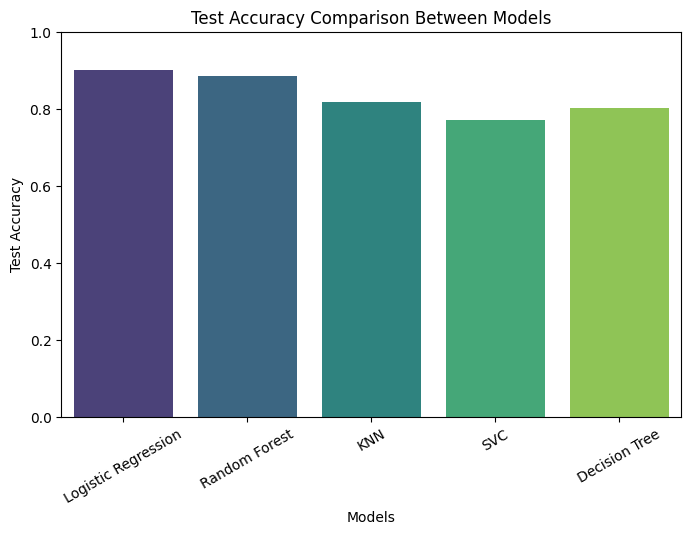

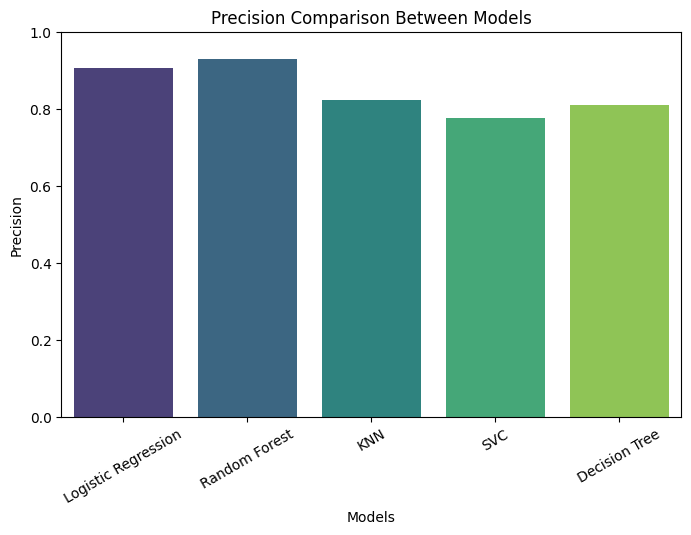

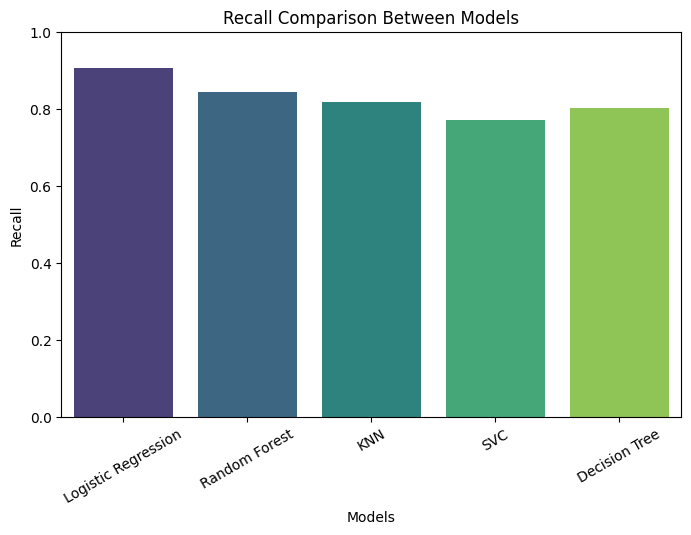

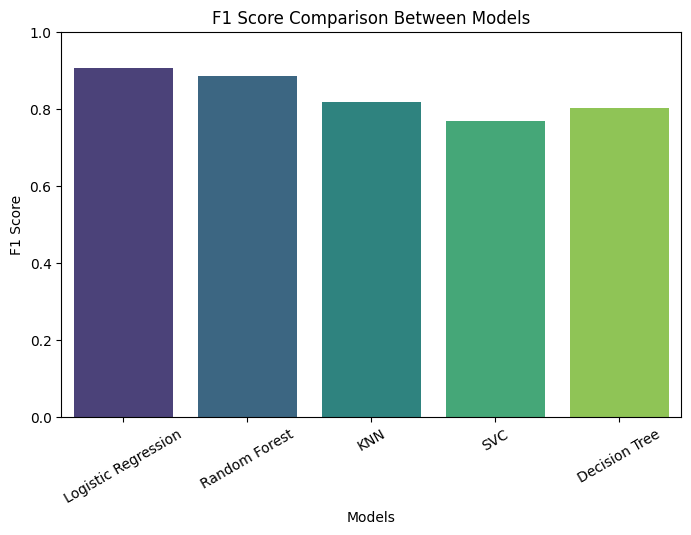

In [27]:
metrics = ["Test Accuracy", "Precision", "Recall", "F1 Score"]

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.barplot(x="Model", y=metric, data=results_df, palette="viridis")
    plt.title(f"{metric} Comparison Between Models")
    plt.ylabel(metric)
    plt.xlabel("Models")
    plt.ylim(0, 1)
    plt.xticks(rotation=30)
    plt.show()